<a href="https://colab.research.google.com/github/sarahem3799/Reddit_Stock_Correlation/blob/main/Indivudal_Report_Sarah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
folder_path = '/content/drive/Shareddrives/GWAR'

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

In [ ]:
df = pd.read_csv(f'/content/drive/Shareddrives/GWAR/final_final.tsv', sep='\t')
df

,edited,is_self,num_comments,over_18,score,Price_change,archived_0.0,archived_1.0,archived_,can_gild_0.0,...,subreddit_id_t5_2qjfk,subreddit_type_,subreddit_type_public,title_TfidfVectorizer(stop_words='english'),whitelist_status_,whitelist_status_all_ads,whitelist_status_promo_adult_nsfw,wls_3.0,wls_6.0,wls_
0,0,True,3,False,3,-1,False,True,False,True,...,True,False,True,True,False,True,False,False,False,True
1,0,False,0,False,0,1,False,True,False,False,...,True,False,True,True,False,True,False,False,False,True
2,0,False,0,False,1,-1,False,True,False,False,...,True,False,True,True,False,True,False,False,False,True
3,0,False,0,False,1,1,False,True,False,False,...,True,False,True,True,False,True,False,False,False,True
4,0,False,0,False,3,-1,False,True,False,False,...,True,False,True,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15997,0,True,19,False,0,1,True,False,False,False,...,True,False,True,True,False,True,False,False,True,False
15998,0,True,91,False,0,1,True,False,False,False,...,True,False,True,True,False,True,False,False,True,False
15999,0,True,29,False,1,1,True,False,False,True,...,True,False,True,True,False,True,False,False,True,False
16000,0,True,253,False,28,1,True,False,False,False,...,True,False,True,True,False,True,False,False,True,False


In [ ]:
df['Price_change']

0       -1
1        1
2       -1
3        1
4       -1
        ..
15997    1
15998    1
15999    1
16000    1
16001    1
Name: Price_change, Length: 16002, dtype: int64

In [ ]:
df.dtypes.unique()

array([dtype('int64'), dtype('bool')], dtype=object)


Test Set Classification Report:
              precision    recall  f1-score   support

          -1       0.40      0.35      0.37      1276
           0       0.00      0.00      0.00        27
           1       0.60      0.65      0.62      1897

    accuracy                           0.53      3200
   macro avg       0.33      0.33      0.33      3200
weighted avg       0.51      0.53      0.52      3200


Validation Set Classification Report:
              precision    recall  f1-score   support

          -1       0.43      0.38      0.40      1300
           0       0.00      0.00      0.00        20
           1       0.60      0.65      0.62      1881

    accuracy                           0.53      3201
   macro avg       0.34      0.34      0.34      3201
weighted avg       0.53      0.53      0.53      3201



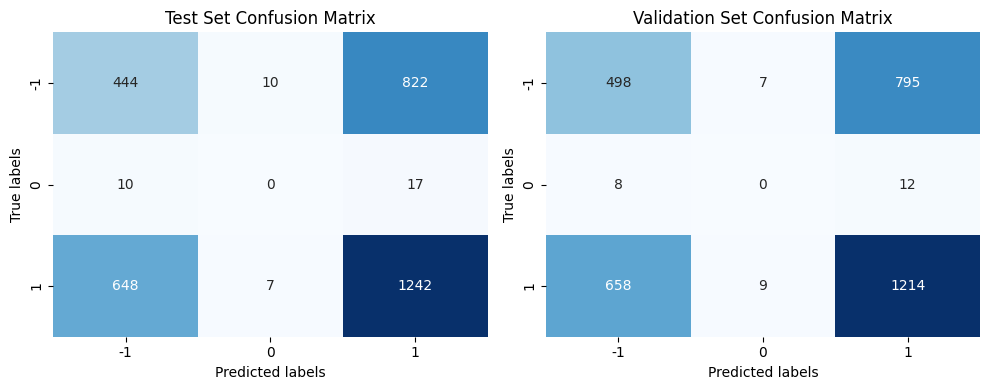

In [ ]:
# Split data into features and target variable
X = df.drop('Price_change', axis=1)
y = df['Price_change']

# Split data into 60% train and 40% (20% test, 20% validation)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Further split the temporary data into 50% test and 50% validation
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize DecisionTreeClassifier
model = DecisionTreeClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
test_predictions = model.predict(X_test)
val_predictions = model.predict(X_val)

# Classification report for test set
print("\nTest Set Classification Report:")
print(classification_report(y_test, test_predictions))

# Classification report for validation set
print("\nValidation Set Classification Report:")
print(classification_report(y_val, val_predictions))

# Confusion matrix for test set
conf_matrix_test = confusion_matrix(y_test, test_predictions)

# Confusion matrix for validation set
conf_matrix_val = confusion_matrix(y_val, val_predictions)

# Plot confusion matrix for test set
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
classes = [-1,0,1]
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Test Set Confusion Matrix')

# Plot confusion matrix for validation set
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_val, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Validation Set Confusion Matrix')

plt.tight_layout()
plt.show()

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Classification Report for Validation Set after Hyperparameter Tuning:
              precision    recall  f1-score   support

          -1       0.47      0.10      0.16      1300
           0       0.00      0.00      0.00        20
           1       0.59      0.92      0.72      1881

    accuracy                           0.58      3201
   macro avg       0.35      0.34      0.30      3201
weighted avg       0.54      0.58      0.49      3201



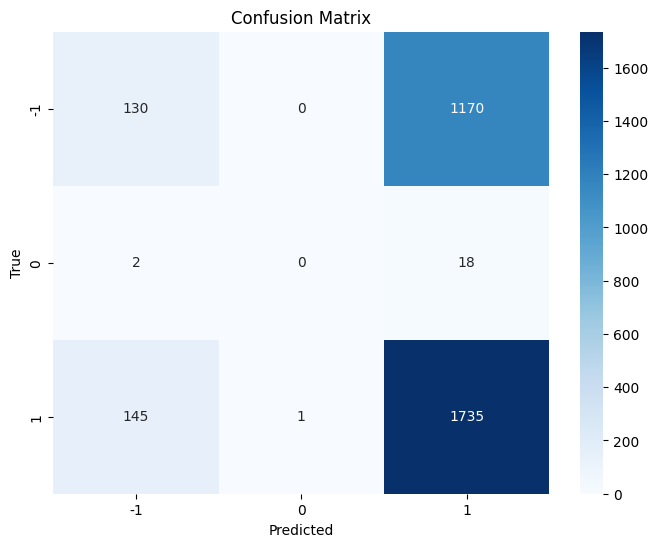

In [ ]:
# Define the hyperparameters grid
param_grid = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the DecisionTreeClassifier instance
dt_classifier = DecisionTreeClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters:", best_params)

# Evaluate the best model on the validation set
val_predictions = best_model.predict(X_val)

# Print classification report
print("Classification Report for Validation Set after Hyperparameter Tuning:")
print(classification_report(y_val, val_predictions, labels=classes))

# Plot confusion matrix
cm = confusion_matrix(y_val, val_predictions, labels=classes)
plt.figure(figsize=(8, 6))
classes = [-1, 0, 1]
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()